In [1]:
import os
from imblearn.over_sampling import SMOTE
from collections import Counter
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing import image
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, MaxPool2D
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve
import seaborn as sns
import keras
from tensorflow.keras.layers import AveragePooling2D,GlobalMaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

In [4]:
# Fungsi untuk memuat gambar dari folder dan mengonversi ke array numpy
def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        path = os.path.join(folder, filename)
        img = image.load_img(path, target_size=(128, 128))  # Ubah ukuran gambar sesuai kebutuhan
        img_array = image.img_to_array(img)
        images.append(img_array)
        labels.append(folder.split('/')[-1])  # Ambil nama kelas dari nama folder

    return np.array(images), np.array(labels)

# Load dataset dari folder
normal_folder = "./dataset/train/Normal"
stone_folder = "./dataset/train/Stone"

normal_images, normal_labels = load_images_from_folder(normal_folder)
stone_images, stone_labels = load_images_from_folder(stone_folder)

# Menggabungkan gambar dan label dari kedua kelas
X = np.concatenate([normal_images, stone_images], axis=0)
y = np.concatenate([normal_labels, stone_labels], axis=0)

# Ubah label ke bentuk numerik
le = LabelEncoder()
y = le.fit_transform(y)

X_train = X
y_train = y

# Tampilkan distribusi kelas sebelum oversampling
print('Distribusi kelas sebelum oversampling:', Counter(y_train))

# Gunakan SMOTE untuk oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train.reshape(-1, 128*128*3), y_train)

# Tampilkan distribusi kelas setelah oversampling
print('Distribusi kelas setelah oversampling:', Counter(y_resampled))

# Ubah kembali ke bentuk array gambar
X_resampled = X_resampled.reshape(-1, 128, 128, 3)

# Normalisasi nilai piksel ke rentang [0, 1]
X_resampled = X_resampled / 255.0
X_train = X_resampled

# Ubah label ke format one-hot encoding
y_resampled = to_categorical(y_resampled, num_classes=2)
y_train = y_resampled

Distribusi kelas sebelum oversampling: Counter({0: 2619, 1: 678})
Distribusi kelas setelah oversampling: Counter({0: 2619, 1: 2619})


In [5]:
X_train.shape,y_train.shape

((5238, 128, 128, 3), (5238, 2))

In [6]:
# Load dataset dari folder
normal_folder = "./dataset/val/Normal"
stone_folder = "./dataset/val/Stone"

normal_images, normal_labels = load_images_from_folder(normal_folder)
stone_images, stone_labels = load_images_from_folder(stone_folder)

# Menggabungkan gambar dan label dari kedua kelas
X = np.concatenate([normal_images, stone_images], axis=0)
y = np.concatenate([normal_labels, stone_labels], axis=0)

# Ubah label ke bentuk numerik
le = LabelEncoder()
y = le.fit_transform(y)

# Normalisasi nilai piksel ke rentang [0, 1]
X_val = X / 255.0
# Ubah label ke format one-hot encoding
y_val = to_categorical(y)

# Tampilkan distribusi kelas 
print('Distribusi kelas:', Counter(y))

Distribusi kelas: Counter({0: 327, 1: 84})


In [7]:
X_val.shape, y_val.shape

((411, 128, 128, 3), (411, 2))

In [10]:
# Load dataset dari folder
normal_folder = "./dataset/test/Normal"
stone_folder = "./dataset/test/Stone"

normal_images, normal_labels = load_images_from_folder(normal_folder)
stone_images, stone_labels = load_images_from_folder(stone_folder)

# Menggabungkan gambar dan label dari kedua kelas
X = np.concatenate([normal_images, stone_images], axis=0)
y = np.concatenate([normal_labels, stone_labels], axis=0)

# Ubah label ke bentuk numerik
le = LabelEncoder()
y = le.fit_transform(y)

# Normalisasi nilai piksel ke rentang [0,1]
X_test = X / 255.0
# Ubah label ke format one-hot encoding
y_test = to_categorical(y)

# Tampilkan distribusi kelas 
print('Distribusi kelas:', Counter(y))

Distribusi kelas: Counter({0: 328, 1: 86})


In [11]:
X_test.shape, y_test.shape

((414, 128, 128, 3), (414, 2))

In [12]:
# Set the CNN model 
input_shape = (128, 128, 3)
num_classes = 2

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=input_shape))
model.add(BatchNormalization())

model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

##############################
model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
##############################
model.add(Flatten())

model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 128, 128, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 batch_normalization_1 (Bat  (None, 128, 128, 32)      128       
 chNormalization)                                                
                                                                 
 average_pooling2d (Average  (None, 64, 64, 32)        0         
 Pooling2D)                                                      
                                                      

In [ ]:
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

# model = Model(pre_trained_model.input, x)
optimizer = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='categorical_crossentropy', 
              optimizer=optimizer, metrics=['accuracy',
                                            keras.metrics.Precision(name='precision'),
                                            keras.metrics.Recall(name='recall'),
                                            tf.keras.metrics.SpecificityAtSensitivity(0.0),
                                            tf.keras.metrics.SensitivityAtSpecificity(0.0)
                                          ])

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, 
                                            min_lr=0.000001, cooldown=2)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

In [34]:
batch_size = 32

epochs = 100

history = model.fit(X_train,y_train, batch_size=batch_size,
                              epochs = epochs, validation_data = (X_val, y_val),
                              verbose = 1, steps_per_epoch=(X_train.shape[0] // batch_size),
                              validation_steps=(X_val.shape[0] // batch_size),
                              callbacks=[learning_rate_reduction, early_stopping])

Epoch 1/100
163/163 [==============================] - 73s 448ms/step - loss: 0.0084 - accuracy: 0.9985 - precision: 0.9985 - recall: 0.9985 - specificity_at_sensitivity_4: 1.0000 - sensitivity_at_specificity_4: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000 - val_specificity_at_sensitivity_4: 1.0000 - val_sensitivity_at_specificity_4: 1.0000 - lr: 1.0000e-04
Epoch 2/100
163/163 [==============================] - 71s 435ms/step - loss: 0.0062 - accuracy: 0.9988 - precision: 0.9988 - recall: 0.9988 - specificity_at_sensitivity_4: 1.0000 - sensitivity_at_specificity_4: 1.0000 - val_loss: 1.2302e-04 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000 - val_specificity_at_sensitivity_4: 1.0000 - val_sensitivity_at_specificity_4: 1.0000 - lr: 1.0000e-04
Epoch 3/100
163/163 [==============================] - 70s 431ms/step - loss: 0.0044 - accuracy: 0.9987 - precision: 0.9987 - recall: 0.9987 - specificity_at_sensitivity_4: 1.000

In [35]:
from sklearn.metrics import f1_score, classification_report

# Prediksi menggunakan model
y_pred_probs = model.predict(X_test)  # Gantilah x_test dengan data uji Anda
y_pred = np.argmax(y_pred_probs, axis=1)  # Ambil indeks kelas dengan probabilitas tertinggi

# Konversi hasil prediksi menjadi bentuk yang sesuai
y_true = np.argmax(y_test, axis=1)  # Gantilah y_test dengan label ground truth

# Hitung F1 Score
f1 = f1_score(y_true, y_pred, average='weighted')  # 'weighted' untuk klasifikasi multiclass

print("F1 Scores:", f1)

# Print laporan klasifikasi
print("Classification Report:")
print(classification_report(y_true, y_pred, digits=4))

13/13 [==============================] - 2s 107ms/step
F1 Scores: 1.0
Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       328
           1     1.0000    1.0000    1.0000        86

    accuracy                         1.0000       414
   macro avg     1.0000    1.0000    1.0000       414
weighted avg     1.0000    1.0000    1.0000       414



In [36]:
import math 
import pandas as pd

los, acc, pre, recall, sensitivity, specificity = model.evaluate(X_test, y_test, verbose=1)

print("Loss : ", los)
print("Acc : ", acc)
print("Precission : ", pre)
print("Recall : ", recall)
print("Sensitivity : ", sensitivity)
print("Specificity : ", specificity)
print("G-mean : ", math.sqrt(sensitivity*specificity))
# print("F1-Score : ", ((2*(pre*recall))/pre+recall))

# Hitung G-mean
g_mean = math.sqrt(sensitivity * specificity)

# Buat dataframe dengan data evaluasi
evaluation_data = {
    'Loss': [los],
    'Accuracy': [acc],
    'Precision': [pre],
    'Recall': [recall],
    'Sensitivity': [sensitivity],
    'Specificity': [specificity],
    'G-mean': [g_mean]
}

df = pd.DataFrame(evaluation_data)
df['f1_scores'] = f1
df['data'] = "smote"
df['model'] = "CNN"
df['epoch'] = len(history.history['loss'])

# Tampilkan dataframe
print(df)

13/13 [==============================] - 1s 109ms/step - loss: 6.1505e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - specificity_at_sensitivity_4: 1.0000 - sensitivity_at_specificity_4: 1.0000
Loss :  0.0006150451954454184
Acc :  1.0
Precission :  1.0
Recall :  1.0
Sensitivity :  1.0
Specificity :  1.0
G-mean :  1.0
       Loss  Accuracy  Precision  Recall  Sensitivity  Specificity  G-mean  \
0  0.000615       1.0        1.0     1.0          1.0          1.0     1.0   

   f1_scores   data model  epoch  
0        1.0  smote   CNN      6  


13/13 [==============================] - 1s 108ms/step


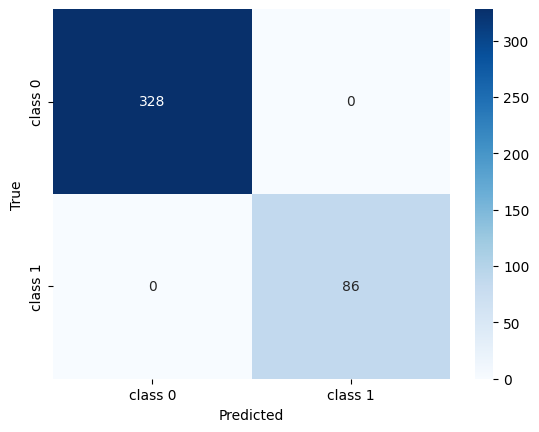

Classification report for classifier <keras.src.engine.sequential.Sequential object at 0x0000019A55A93550>:
              precision    recall  f1-score   support

     class 0     1.0000    1.0000    1.0000       328
     class 1     1.0000    1.0000    1.0000        86

    accuracy                         1.0000       414
   macro avg     1.0000    1.0000    1.0000       414
weighted avg     1.0000    1.0000    1.0000       414




In [22]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions to class labels
Y_pred_classes = np.argmax(Y_pred, axis=1)
# Convert validation observations to class labels
Y_true = np.argmax(y_test, axis=1)

# Get the number of classes (number of unique class labels)
num_classes = len(np.unique(Y_true))

# Compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# Define class labels based on your specific problem
class_labels = ['class 0', 'class 1']

# Plot the confusion matrix
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Show the classification report
print("Classification report for classifier %s:\n%s\n"
      % (model, classification_report(Y_true, Y_pred_classes, target_names=class_labels, digits=4)))


Tes Privat Data

In [37]:
# Load dataset dari folder
normal_folder = "./privatData/Normal"
stone_folder = "./privatData/Stone"

normal_images, normal_labels = load_images_from_folder(normal_folder)
stone_images, stone_labels = load_images_from_folder(stone_folder)

# Menggabungkan gambar dan label dari kedua kelas
X = np.concatenate([normal_images, stone_images], axis=0)
y = np.concatenate([normal_labels, stone_labels], axis=0)

# Ubah label ke bentuk numerik
le = LabelEncoder()
y = le.fit_transform(y)

# Normalisasi nilai piksel ke rentang [0, 1]
X_privat = X / 255.0
# Ubah label ke format one-hot encoding
y_privat = to_categorical(y)

# Tampilkan distribusi kelas 
print('Distribusi kelas:', Counter(y))

Distribusi kelas: Counter({0: 540, 1: 446})


In [38]:
from sklearn.metrics import f1_score, classification_report

# Prediksi menggunakan model
y_pred_probs = model.predict(X_privat)  # Gantilah x_test dengan data uji Anda
y_pred = np.argmax(y_pred_probs, axis=1)  # Ambil indeks kelas dengan probabilitas tertinggi

# Konversi hasil prediksi menjadi bentuk yang sesuai
y_true = np.argmax(y_privat, axis=1)  # Gantilah y_test dengan label ground truth

# Hitung F1 Score
f1 = f1_score(y_true, y_pred, average='weighted')  # 'weighted' untuk klasifikasi multiclass

print("F1 Scores:", f1)

# Print laporan klasifikasi
print("Classification Report:")
print(classification_report(y_true, y_pred, digits=4))

31/31 [==============================] - 3s 108ms/step
F1 Scores: 0.6267703716628713
Classification Report:
              precision    recall  f1-score   support

           0     0.6305    0.9037    0.7428       540
           1     0.7547    0.3587    0.4863       446

    accuracy                         0.6572       986
   macro avg     0.6926    0.6312    0.6145       986
weighted avg     0.6867    0.6572    0.6268       986



In [39]:
import math 
import pandas as pd

los, acc, pre, recall, sensitivity, specificity = model.evaluate(X_privat, y_privat, verbose=1)

print("Loss : ", los)
print("Acc : ", acc)
print("Precission : ", pre)
print("Recall : ", recall)
print("Sensitivity : ", sensitivity)
print("Specificity : ", specificity)
print("G-mean : ", math.sqrt(sensitivity*specificity))
# print("F1-Score : ", ((2*(pre*recall))/pre+recall))

# Hitung G-mean
g_mean = math.sqrt(sensitivity * specificity)

# Buat dataframe dengan data evaluasi
evaluation_data = {
    'Loss': [los],
    'Accuracy': [acc],
    'Precision': [pre],
    'Recall': [recall],
    'Sensitivity': [sensitivity],
    'Specificity': [specificity],
    'G-mean': [g_mean]
}

df = pd.DataFrame(evaluation_data)
df['f1_scores'] = f1
df['data'] = "Tes Privat Smote"
df['model'] = "CNN"
df['epoch'] = len(history.history['loss'])

# Tampilkan dataframe
print(df)

31/31 [==============================] - 3s 108ms/step - loss: 1.3615 - accuracy: 0.6572 - precision: 0.6572 - recall: 0.6572 - specificity_at_sensitivity_4: 1.0000 - sensitivity_at_specificity_4: 1.0000
Loss :  1.3615472316741943
Acc :  0.657200813293457
Precission :  0.657200813293457
Recall :  0.657200813293457
Sensitivity :  1.0
Specificity :  1.0
G-mean :  1.0
       Loss  Accuracy  Precision    Recall  Sensitivity  Specificity  G-mean  \
0  1.361547  0.657201   0.657201  0.657201          1.0          1.0     1.0   

   f1_scores              data model  epoch  
0    0.62677  Tes Privat Smote   CNN      6  


31/31 [==============================] - 3s 103ms/step


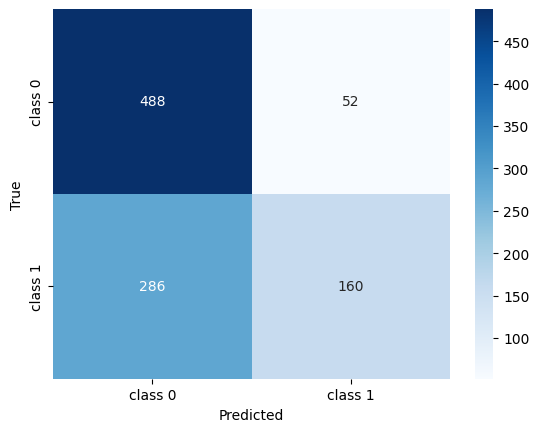

Classification report for classifier <keras.src.engine.sequential.Sequential object at 0x0000019A55A93550>:
              precision    recall  f1-score   support

     class 0     0.6305    0.9037    0.7428       540
     class 1     0.7547    0.3587    0.4863       446

    accuracy                         0.6572       986
   macro avg     0.6926    0.6312    0.6145       986
weighted avg     0.6867    0.6572    0.6268       986




In [42]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict the values from the validation dataset
Y_pred = model.predict(X_privat)
# Convert predictions to class labels
Y_pred_classes = np.argmax(Y_pred, axis=1)
# Convert validation observations to class labels
Y_true = np.argmax(y_privat, axis=1)

# Get the number of classes (number of unique class labels)
num_classes = len(np.unique(Y_true))

# Compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# Define class labels based on your specific problem
class_labels = ['class 0', 'class 1']

# Plot the confusion matrix
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Show the classification report
print("Classification report for classifier %s:\n%s\n"
      % (model, classification_report(Y_true, Y_pred_classes, target_names=class_labels, digits=4)))
